In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Name 1: Catherine Magee
- Name 2: Morgan Mote
- Name 3: Luv Patel

___

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 1.0.2


In [3]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = np.array(ds.target != b'normal.')
y = y.astype(int)

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of instances in each of the classes.**

Number of instances in each class:
[56516  2209]


<BarContainer object of 2 artists>

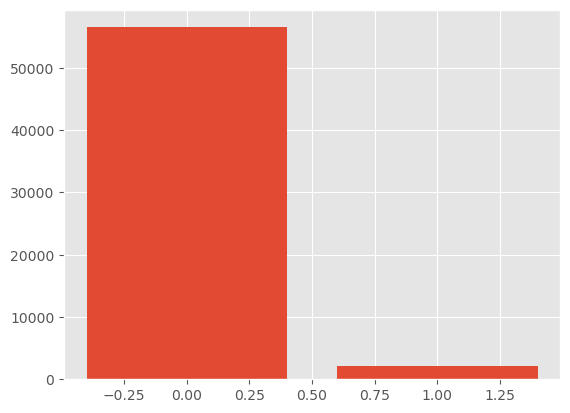

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#=== Fill in code below========
print('Number of instances in each class:')
# you might be interested in the functions:
#     np.bincount
#     plt.hist

# calculates the number of instances in each class
print(np.bincount(y))

#displays the class imbalence in a histogram
plt.bar([0, 1], np.bincount(y))

<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation
Look at the following code that trains a model using 10-fold cross validation. You can also run this code to see the outputs. Then answer the question below it. 

You might also be interested in the following graphic: 
- https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg

And the following:
$$ Precision = \frac{TP}{TP+FP} $$

and

$$ Recall = \frac{TP}{TP+FN} $$

and 

$$ F_1 = \frac{Precision\cdot Recall}{Precision + Recall} $$

and a new score that you might like to look at:

$$ F_{\beta} = (1+\beta^2)\cdot\frac{Precision\cdot Recall}{\beta^2\cdot Precision + Recall} $$

(0.9894891008174387, 1.0)

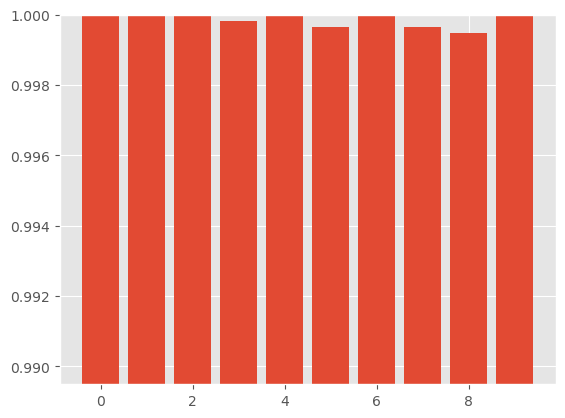

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
#select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset (i.e., using KFold)? Why or why not? 



*Enter your answer here (double click)*

*Yes or No and why*


    When using K-fold there is no garentee that there will be a good distribution of the dataset. For exmaple there could be an inbalence of positives in our dataset distribution of the training and testing sets. wWhich means there will not be a proper separation of the dataset to fix this we need to stratify the dataset!


**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset (i.e., using accuracy)? Why or Why not?

*Enter your answer here (double click)*

*Yes or No and why* 

To begin below we have definitions of false postive and false negatives in this dataset: 

	- False positive: SOMEONE IS ATTACKING ME! but in reality no one is attacking you
	- False negative: Assumption that the system is protected BUT THE ATTACKER GOT IN
    
    In this situation we care about both the false positive and false negative values but we care the most about 
    false negatives. The recall evaluation metric cares more about false negative so me know we want to increase
    the recall value in our evaulation metric. The precision evaluation metric cares more about the false positive
    value and we care about this value but not as much as false negative so we will still try and increase
    precision but not as much as recall. Therefore our group chose not to use precision, recall, or f1 as our 
    evaluation metric. Our group chose to use F1 beta as our evaluation metric because it is a generalization of 
    the F1 score. Fβ generalizes the F1 score by introducing a factor β to adjust the balance between precision 
    and recall. 
    
    After deciding we should use Fβ we needed to decide the value of β. 
    
    -  β>1: Recall is considered more important than precision. This might be useful in situations where missing
    an actual positive (false negative) is more costly than falsely identifying a negative as positive (false 
    positive).
    
    - β<1: Precision is given more weight. Given the scenario with the attack samples, missing an actual attack
    (false negative) might be more harmful than identifying a normal activity as an attack (false positive).
    
    Since we want to maximize the false negative value we should chose a β that is greater than 1. 
    

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). **Mark changes in the code with comments.**

Text(0.5, 1.0, 'F1-Score: 0.99764')

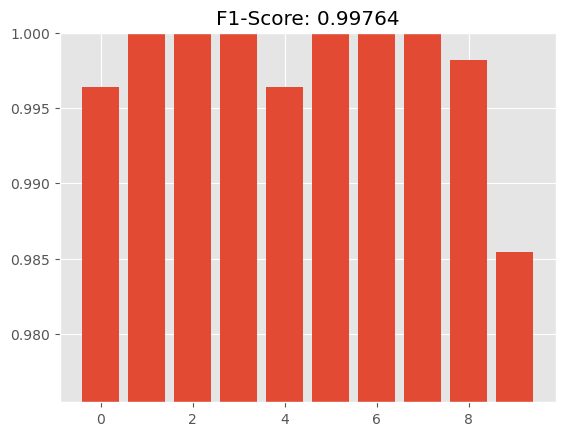

In [12]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold, ShuffleSplit
# from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score

# from sklearn.linear_model import LogisticRegression
# # # these imports above might help you

# # #=====Write your code below here=================

# # Define a custom F_beta scorer (assuming beta=2 for higher recall emphasis)
# def custom_fbeta(y_true, y_pred, beta=2):
#     return fbeta_score(y_true, y_pred, beta=beta)

# my_fbeta_scorer = make_scorer(custom_fbeta)

# # Select model
# clf = LogisticRegression()
# # Select cross-validation: Using StratifiedKFold for imbalanced datasets
# cv = StratifiedKFold(n_splits=10)  # <-- Change here
# # Select evaluation criteria: Using F_beta score instead of accuracy
# my_scorer = my_fbeta_scorer  # <-- Change here
# # Run model training and cross-validation
# per_fold_eval_criteria = cross_val_score(estimator=clf,
#                                          X=X,
#                                          y=y,
#                                          cv=cv,
#                                          scoring=my_scorer
#                                         )

# plt.bar(range(len(per_fold_eval_criteria)), per_fold_eval_criteria)
# plt.ylim([min(per_fold_eval_criteria)-0.01, max(per_fold_eval_criteria)])

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Define a custom F_beta scorer (assuming beta=2 for higher recall emphasis)
def custom_fbeta(y_true, y_pred, beta=2):
    return fbeta_score(y_true, y_pred, beta=beta)

my_fbeta_scorer = make_scorer(custom_fbeta)

# Select model
clf = LogisticRegression()

# Select cross-validation: Using StratifiedKFold for imbalanced datasets
cv = StratifiedKFold(n_splits=10)  # <-- Change here, we used startified k-fold instead of normal k-fold

# Select evaluation criteria: Using F_beta score instead of accuracy
my_scorer = my_fbeta_scorer  # <-- Change here, here we used f1 beta instead of accuracy for validation 

# Run model training and cross-validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                         X=X,
                                         y=y,
                                         cv=cv,
                                         scoring=my_scorer
                                        )

plt.bar(range(len(per_fold_eval_criteria)), per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01, max(per_fold_eval_criteria)])
plt.title(f"F1-Score: {per_fold_eval_criteria.mean():.5f}")

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not, based on the way the system will be used?

Following the adjustments to the learning algorithm, we are pleased to report a remarkable performance improvement. Our latest round of testing yielded an outstanding F1-Score of 0.99764. This figure is strikingly close to the ideal value of 1, underscoring an exceptional level of precision and recall. These results are a testament to the optimized efficiency of our metrics.

In contrast, if our observations had revealed a significantly lower F1-Score, it would have raised concerns regarding the suboptimal performance of precision and recall. Such instances would have warranted a comprehensive investigation into the underlying factors affecting these metrics.
___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, explain the errors in the space provided below and then fix the code below so that there are no longer any errors in the cross validation.


*Explain any cross validation errors here (double click to edit)*

    In the provided code, PCA is applied prior to data standardization, which may not be optimal for effective PCA performance. Particularly when working with datasets like KDDCup99, where features have varying scales, it's imperative to standardize the data before employing PCA. The KDDCup99 dataset presents a notable imbalance, with approximately 2,000 of its 60,000 samples being classified as attacks. This imbalance further accentuates the importance of proper data preprocessing. In our revised approach, we've taken measures to first standardize the data, subsequently apply PCA, and then proceed with the logistic regression model. This sequence of operations ensures that the PCA truly captures the inherent structures and relationships in the data, without being unduly influenced by feature scales, leading to a more robust and insightful analysis. Also performing PCA on the entire dataset (X) and then using the transformed data (Xpca) for cross-validation. This approach leaks information from the test sets into the training sets during each fold of cross-validation because PCA is fitted on the entire dataset. Ideally, PCA should be included as part of the pipeline, so it's trained only on training data during each fold of the cross-validation.

(0.9754677565849227, 1.0)

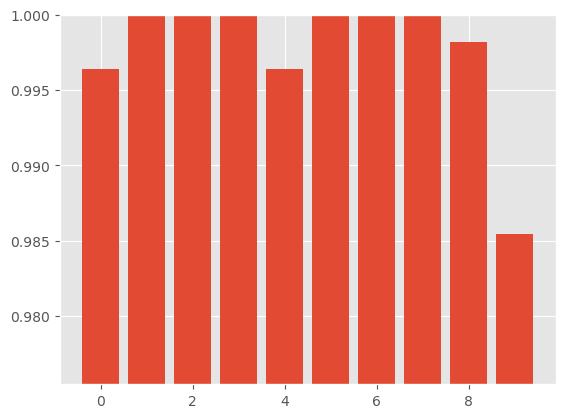

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Fit PCA without reducing components
# pca = PCA()
# pca.fit(X_scaled)
# n_components = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1
# #======If there are errors, fix them below======
# # n_components = 1
# pca = PCA(n_components=n_components)
# Xpca = pca.fit_transform(X)

# clf = Pipeline([('scl',StandardScaler()),
#                 ('clf',LogisticRegression())])

# per_fold_eval_criteria = cross_val_score(estimator=clf,
#                                     X=Xpca,
#                                     y=y,
#                                     cv=cv,
#                                     scoring=my_scorer
#                                    )

# plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
# plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# # =====fixed code======
# # write the fixed code (if needed) below

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA without reducing components
pca = PCA()
pca.fit(X_scaled)
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1
pca = PCA(n_components=n_components)
Xpca = pca.fit_transform(X_scaled)  # Apply PCA to the scaled data

clf = Pipeline([('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('clf', LogisticRegression())
])

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                         X=Xpca,
                                         y=y,
                                         cv=cv,
                                         scoring=my_scorer
                                        )

plt.bar(range(len(per_fold_eval_criteria)), per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01, max(per_fold_eval_criteria)])

___

# Circumstances Change
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained because new attacks will emerge.
 - DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
 - DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks. However, they tell you that the amount of training data for the new attacks will be extremely small. That is, the analysts can only identify a handful of new style attacks each day (so you will only have about 3-5 examples of the attacks for training).
- **DARPA asks you: Do you think its a good idea to employ retraining your model each day to find these new attacks?** They need an answer in the next 20 minutes.  

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA when there are only 3-5 attack examples available for training? *Note: you do not have access to these new training examples. You need to change you cross validation method with the existing data to answer this question.* 

*Enter your answer here (double click)*

*We could... and why*
___


Addressing the updated requirements of the DARPA KDD99 cup scenario, there is an inherent challenge in training a model effectively with the daily provision of only 3-5 examples of new attacks. This limited dataset not only restricts the information the model can learn from but also significantly heightens the risk of model overfitting. Overfitting occurs when the model becomes too attuned to the specificities of the training data, compromising its ability to generalize to unseen instances.

A viable solution to combat this data scarcity is the generation of synthetic samples for these novel attacks. Employing techniques such as the Synthetic Minority Over-sampling Technique (SMOTE) can enhance our training dataset by creating artificial data points that resemble the new attack types. This augmentation serves a dual purpose: it mitigates the issues arising from limited real-world examples and diminishes the likelihood of overfitting by offering a richer dataset for the model to train on.

Furthermore, given the nature of the dataset, these additional strategies could be integrated:

Undersampling the Majority Class: This entails reducing the instances of the dominant class to create a more balanced dataset. Though it makes the class distribution more even, one should be cautious as it might result in discarding valuable information.

Oversampling the Minority Class: This involves amplifying the presence of the minority class, either by replicating existing data points or generating synthetic ones. This ensures a more representative training phase, providing the model with a broader perspective on both the common and rare attack types.

Incorporating these methodologies ensures that the model is equipped with a more diverse and representative dataset. This fosters a comprehensive understanding of both known and new attack patterns, yielding a model that is not only informed but also adaptable to emerging threats.

In [8]:
#plotting function for use in next question
# takes input 'test_scores', axis labels, and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and the output (please rerun with your evaluation criteria), then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why? *Note: the x-axis really is a percentage, so the value 0.1 is actually 0.1%.*

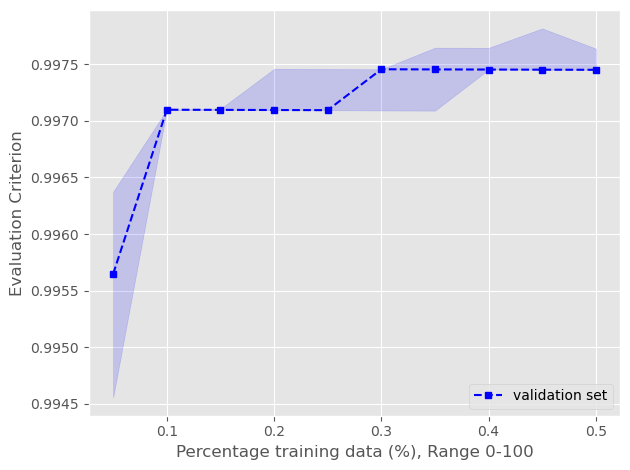

In [9]:
clf = LogisticRegression()

test_scores = []
train_sizes=np.linspace(5e-4,5e-3,10)

for size in train_sizes:
    cv = StratifiedShuffleSplit(n_splits=100,
                                train_size = size,
                                test_size = 1-size,
                               )
    test_scores.append(cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=my_scorer))

plot_filled(np.array(test_scores), train_sizes*100, 'Percentage training data (%), Range 0-100')

___
*Enter you answer here (double click)*

*It seems that ...*
___
From the graph, several observations can be made:

Performance Boost at Lower Percentages: Initially, when the training data is extremely limited (around 0.1%), there is a noticeable jump in the evaluation criterion. This indicates that even a small addition to the training data at this stage can lead to a significant performance improvement.

Diminishing Returns after 0.2%: After around 0.2% of the training data, the rate of improvement in the evaluation criterion begins to plateau. The model's performance doesn't benefit as much from additional training data beyond this point.

Variance Reduction with More Data: The shaded region represents the variability in the evaluation criterion, potentially due to different cross-validation folds. It's clear that as more training data is incorporated, the variance (uncertainty) in the model's performance decreases. This means the model becomes more consistent in its predictions.

Based on these observations, the optimal trade-off between bias and variance appears to be reached at about 0.2% of the training data. Beyond this point, adding more positive examples doesn't lead to a substantial boost in the median performance, but it does reduce the variance.

Thus, for DARPA's concerns, it would be recommended to aim for at least 0.2% of positive examples from the entire dataset to train their model. Given the challenging scenario of identifying new types of attacks, and considering the graph, securing around 0.2% positive examples would be a good starting point to achieve a balance between bias and variance.

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [10]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals

*Enter you answer here (double click)*

*The reason that I think (A or B or C) is correct is because...*
___
Given the way the data is being split and evaluated using StratifiedShuffleSplit, Option B is the most suitable. Approximating the bounds using the folds of the cross-validation to determine mean and variance aligns directly with the methodology used in the code. It takes into account the variability of model performance across different subsets of the data, making it a more reliable and appropriate method for obtaining confidence intervals in this context. When using cross-validation, especially something like StratifiedShuffleSplit, the evaluation criterion is computed multiple times across different subsets (folds) of the data.This approach doesn't make assumptions about the underlying distribution of the data unlike binomial distribution which assumes that there are only two possible outcomes for each trial. Instead, approximating the bounds using the folds of the cross validation to get mean and variance uses the variability across different folds to estimate the mean and variance of the evaluation criterion.Given that we're explicitly using cross-validation folds in the provided code, this method aligns better with the data splitting strategy. The variability in performance across different folds can give us insights into the stability and consistency of the model's performance.


___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

In [11]:
#===================================================
# Enter your code below
from functools import reduce

metric = "F1-Score"

model_1 = evals1
model_2 = evals2
model_3 = evals3

model_scores = [("1", model_1), ("2", model_2), ("3", model_3)]
t = 2.26 / np.sqrt(10)

calc_err = lambda model: 1 - model
model_errs = [calc_err(model) for model in [model_1, model_2, model_3]]

error = reduce(lambda a, b: a + b, model_errs)
std_total = np.std(error)
mean_of_folds = np.mean(error)

ci_rng = [mean_of_folds - t * std_total, mean_of_folds + t * std_total]

if not ci_rng[0] < 0 < ci_rng[1]:
    print(
        "Since the range of the confidence interval does not include zero, "
        "we can say with statistical confidence (95%) "
        "that these classifiers are different than one another, thus "
        "we can say that one of them is better than the other."
    )
    print(
        f"Model {max(model_scores, key=lambda m: m[1].mean())[0]} "
        f"has statistically the best {metric} with 95% confidence."
    )
else:
    print(
        "We cannot say with statistical (95%) confidence "
        "that these classifiers are different than one another."
    )
#===================================================

Since the range of the confidence interval does not include zero, we can say with statistical (95%) confidence that these classifiers are different than one another, thus we can say that one of them is better than the other.
Model 1 has statistically the best F1-Score with 95% confidence.


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.